## Problem Statement
  
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

The company wants to know:

    a. Which variables are significant in predicting the demand for shared bikes.
    b. How well those variables describe the bike demands

Goal for this assignment is to:

    a. Build a linear regression model that will predict the demand for shared bikes with the provided independent variables
    b. To be used by the company management to determine how exactly the demands vary with various features and to use this information to manipulate business strategy to meet the market demand and customer's expectations.


In [225]:
#Import all required libraries

import numpy as np
import pandas as pd
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
print("Imported libraries")

Imported libraries


# Step 1: Reading and understanding data

In [226]:
# read file
bike_df = pd.read_csv("day.csv")

In [227]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [228]:
# check the dtatypes and not-null for columns in the dataset
bike_df.info()
#observe that all are non null columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [229]:
#Find the number of rows and columns in the dataset
bike_df.shape

(730, 16)

In [231]:
# Check the statistics for all numeric values in the dataset
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Observations:
       a. There are 730 rows and 16 columns in the dataset
       b. There are no null values present in the dataset
       c. Columns instant seems to be an index column which may not be required for our analysis and hence could be dropped
       d. Similary, column dteday contains date value. Since there are other columns such as weekday, mnth and yr which contains the same information, this column is a redundant one and therefore could be dropped
       e. From the data dictionary, we observe that column cnt is a sum of columns causal and registered. The target variable is actually the cnt. Hence these 2 columns could also be dropped from the analysis

## Step 2: Cleaning Data

### Dropping columns that are not useful for our analysis

In [232]:
# Droping instant column as it is index column which has nothing to do with target
bike_df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have mnth, weekday and yr columns to work with
bike_df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

bike_df.drop(['casual'], axis = 1, inplace = True)
bike_df.drop(['registered'], axis = 1, inplace = True)

In [233]:
#Check the data
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Step 3: Visualizing the data


### Step 3.1 Check for any outliers

In [234]:
# Check for non unique values
bike_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

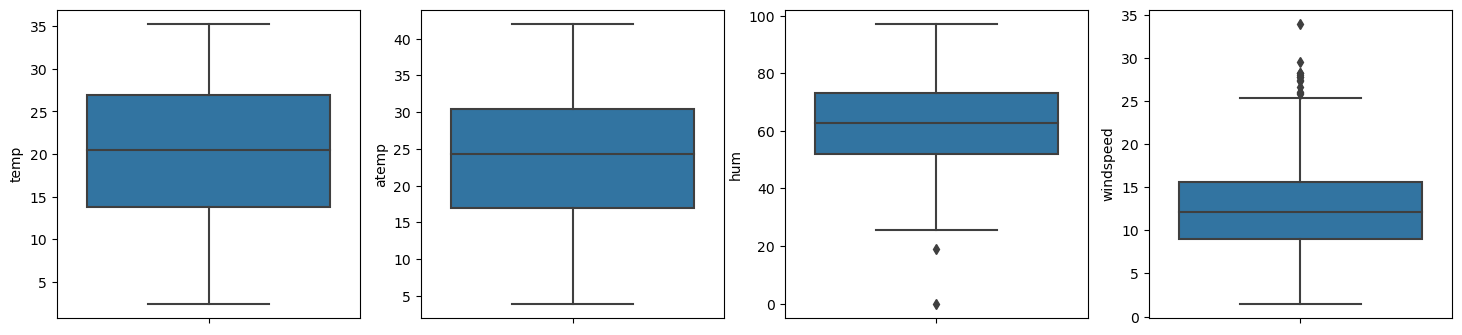

In [235]:
# Draw box plots for indepedent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_df)
    i+=1

### Observations:
    a. There are no significant outliers on the independent variables - temp, atemp, hum and windspeed
    b. From the box plot, it seems columns temp and atemp have similar values

### 3.2 Check for relationship between indendent variables having continuous values

<Figure size 1500x3000 with 0 Axes>

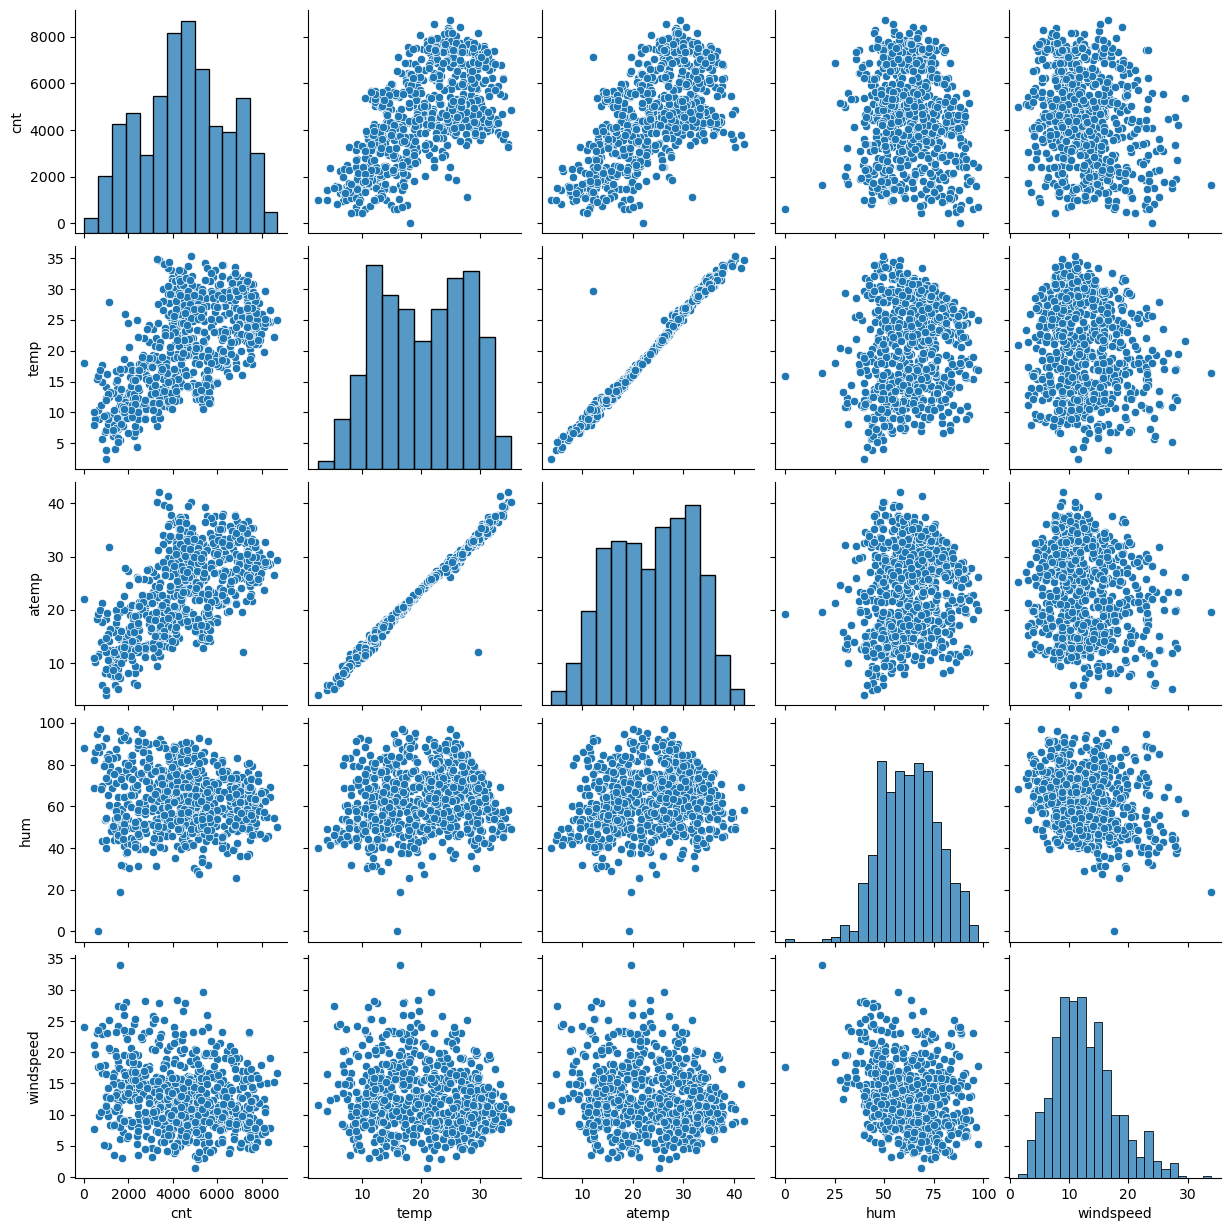

In [236]:
#Draw pairplots for these continuous numeric variables
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

### Observations:
     a. temp and atemp variables are highly correlated with the target variable cnt and have a linear relationship
     b These two variables are higly correlated with themselves.  We could consider dropping one of them as they seem to be redundant

### 3.3 Pairplot visualization on all numeric columns in the dataset

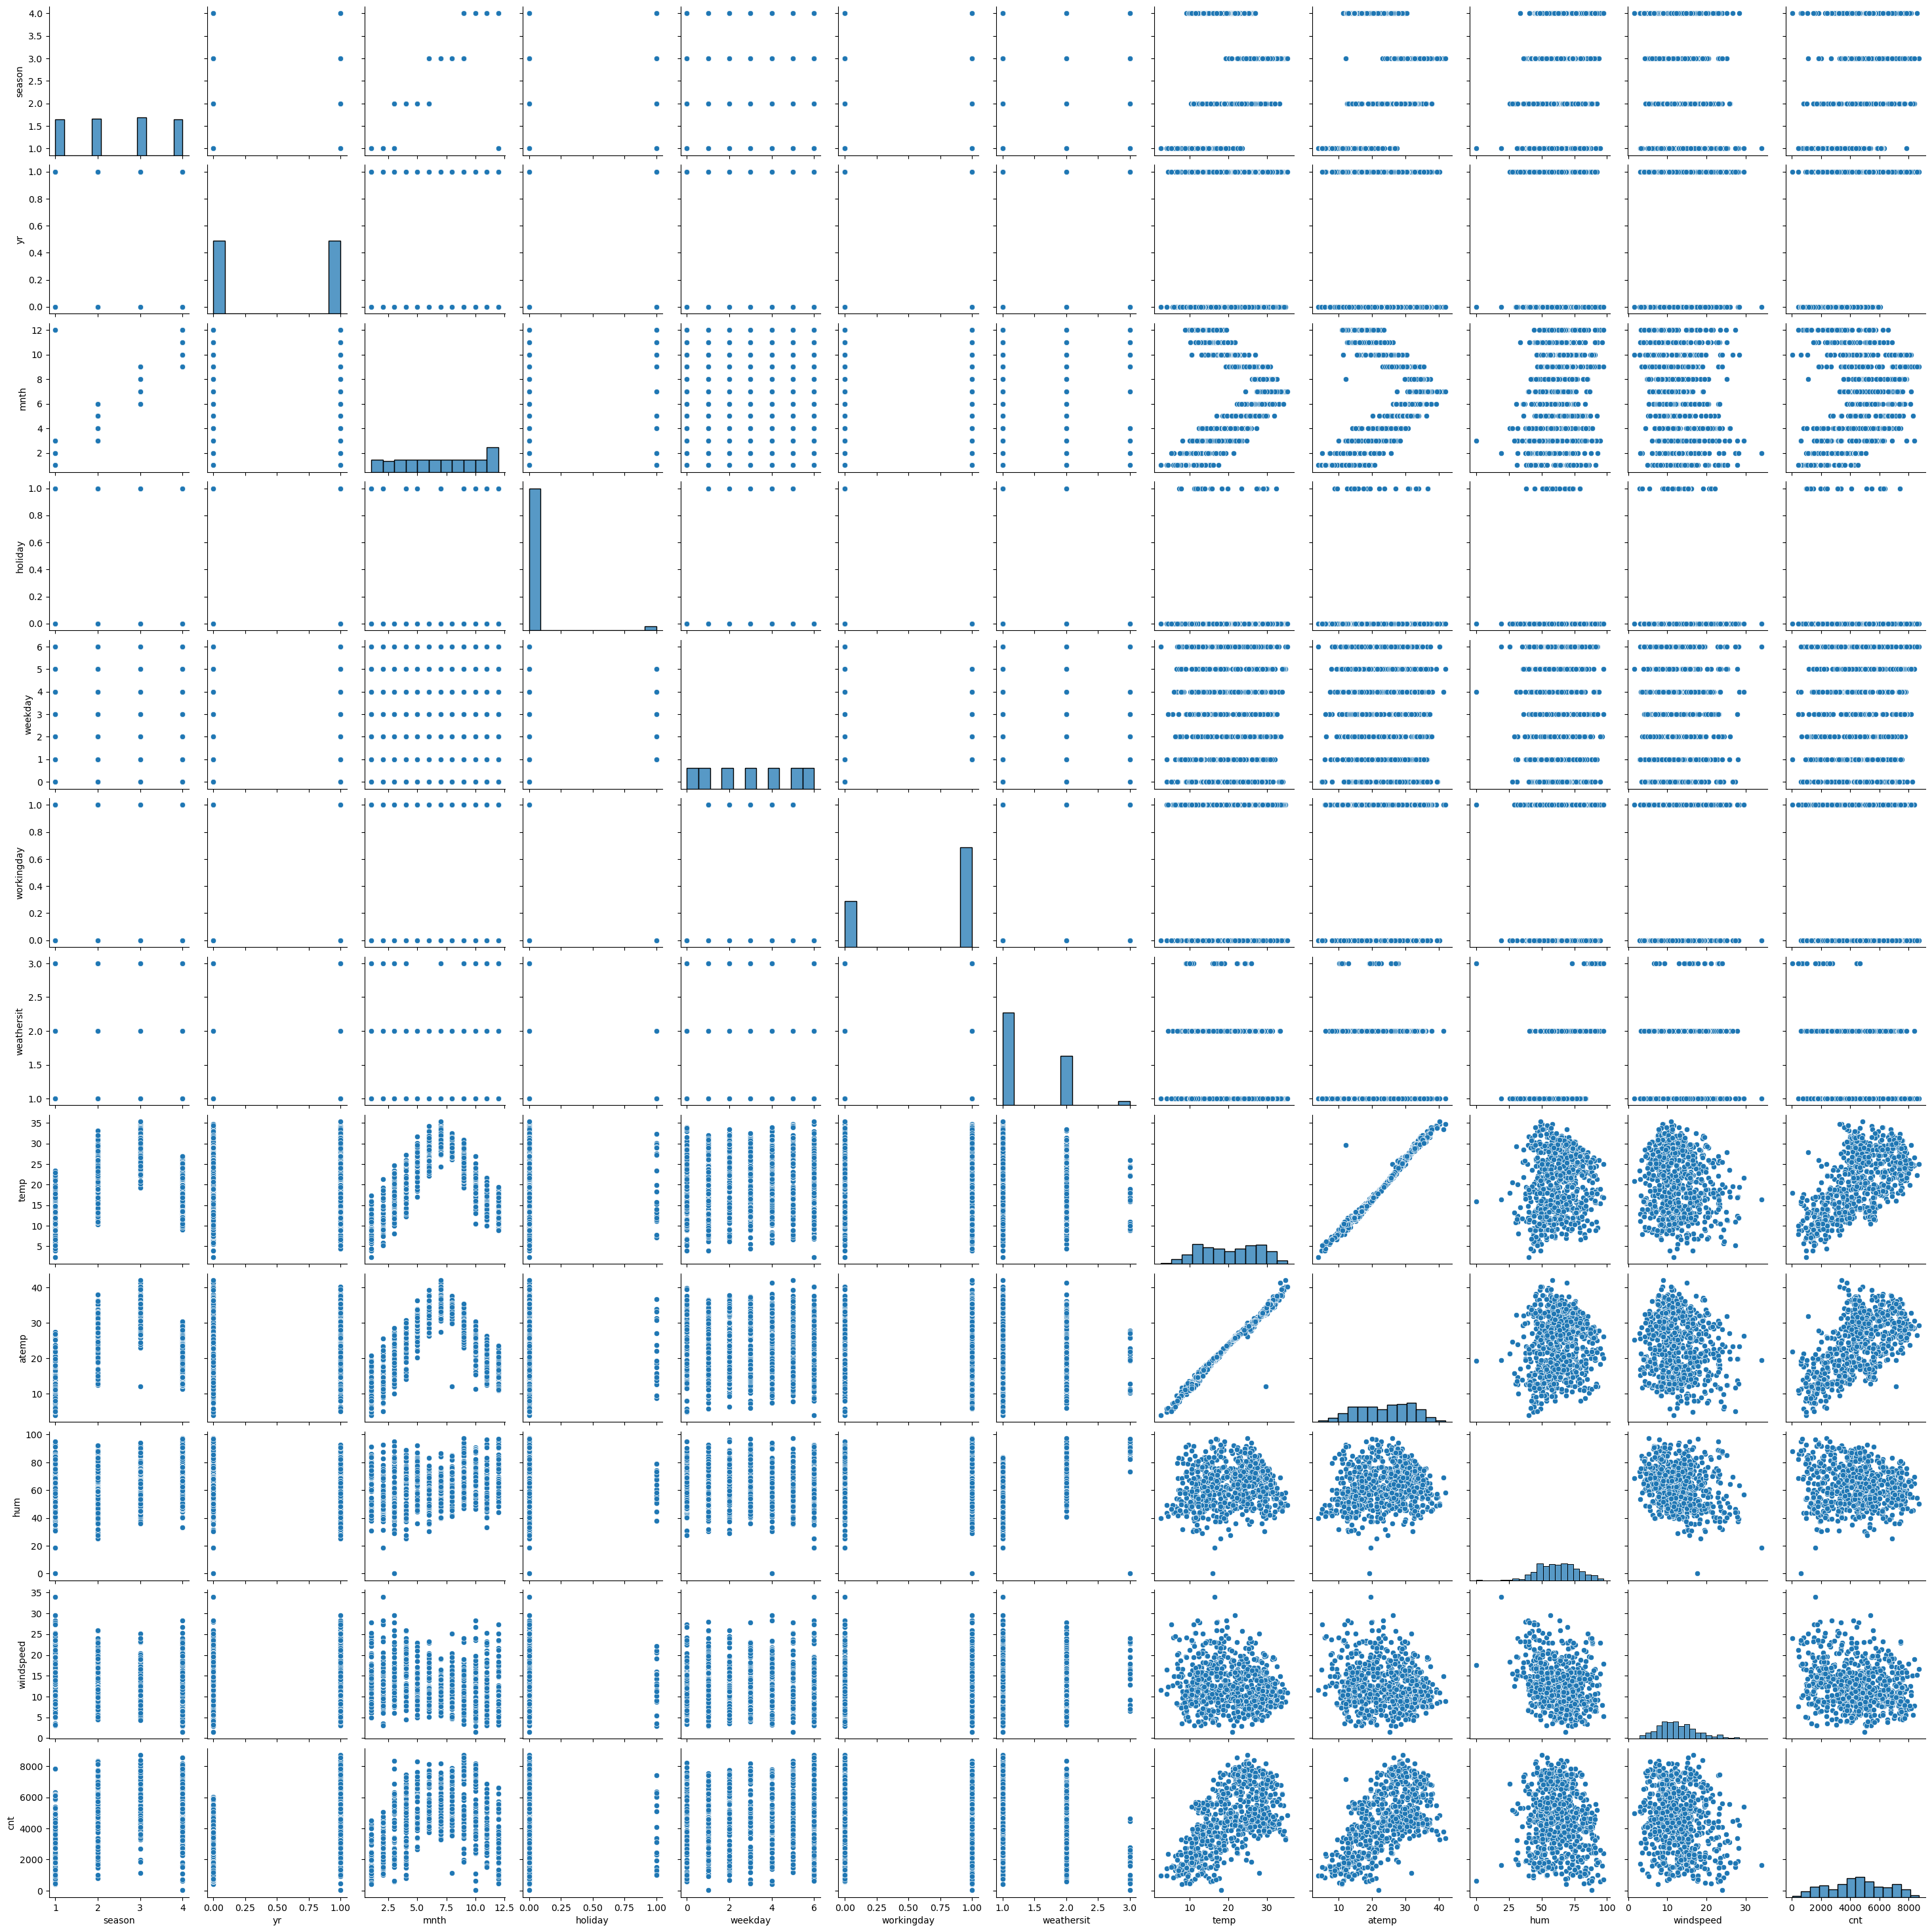

In [237]:
# Drawing pairplot on all numeric variables provided in the dataset
sns.pairplot(bike_df)
plt.show()

 ### 3.4 Visualizing Categorial Variables

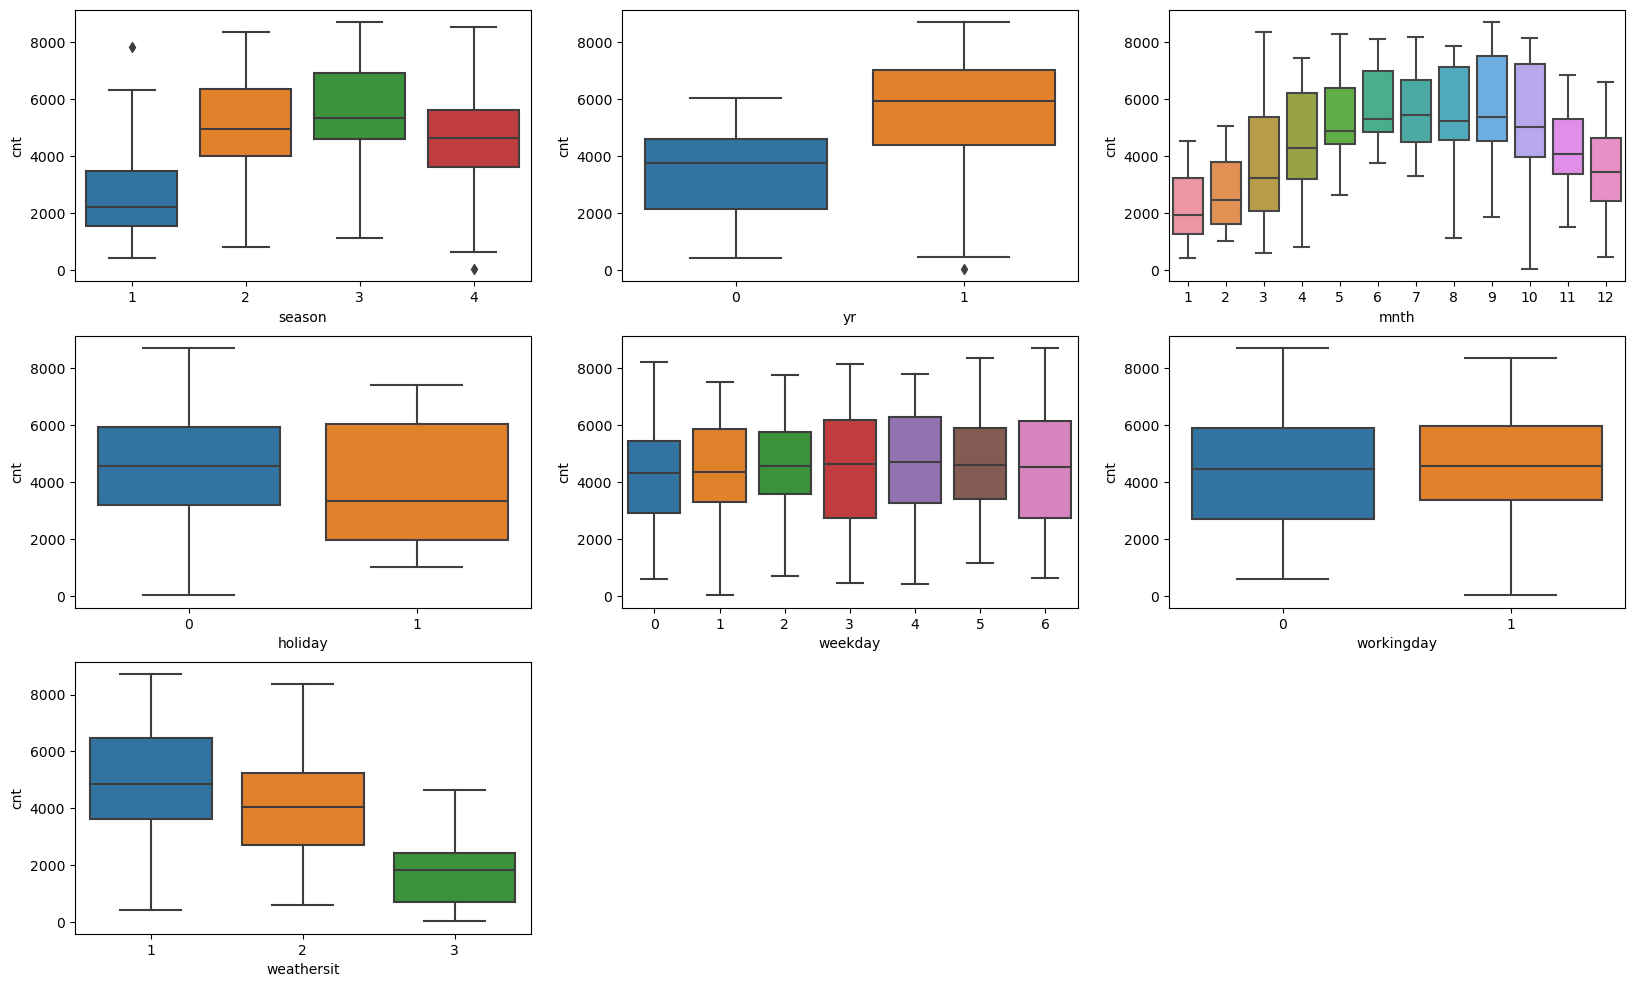

In [238]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(20, 12))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike_df, x=i[1], y='cnt')
plt.show()

### Observations:
    a. Fall Season (with value 3) seems to have highest demand amongst all seasons
    b. Demand for bikes have increased year-on-year
    c. September month seems to have highest demand for bike rentals
    d. Demand for bikes are less during holidays
    e. Number of Bike rentals does not seem to vary much whether it is a weekday or not
    f. Clear weathersit (value=1) has the higest demand
    g. Demands are rising steadily from Jan to Sep and decreases afterwards.

In [239]:
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [240]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Step 4:  Data Preparation for multi-linear regression modelling

#### We observe that the following categorical columns have more than 2 distinct values (levels).  Hence we will create dummy Variables for them
 1. season
 2. mnth
 3. weekday
 4. weathersit

In [241]:
#Creating dummy variables - spring, summer, fall and winter for season column
seasondummies = pd.get_dummies(bike_df.season,prefix='seasonval',dtype=int)
print(seasondummies)

     seasonval_1  seasonval_2  seasonval_3  seasonval_4
0              1            0            0            0
1              1            0            0            0
2              1            0            0            0
3              1            0            0            0
4              1            0            0            0
..           ...          ...          ...          ...
725            1            0            0            0
726            1            0            0            0
727            1            0            0            0
728            1            0            0            0
729            1            0            0            0

[730 rows x 4 columns]


### Here, 
      1000 correspond to Spring
      0100 correspond to Summer
      0010 correspond to Fall
      0001 correspond to Winter

In [242]:
# Rename columns to be more readable
seasondummies.columns = ['season_spring','season_summer','season_fall','season_winter']

In [243]:
# Now, check how the dataset 'seasondummies' looks like
seasondummies.head()

,season_spring,season_summer,season_fall,season_winter
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [244]:
#Since we can easily identify the seasons with just 3 columns, we will drop the 1st one - season_spring
seasondummies.drop(['season_spring'],axis=1, inplace = True)

In [245]:
print(seasondummies)

     season_summer  season_fall  season_winter
0                0            0              0
1                0            0              0
2                0            0              0
3                0            0              0
4                0            0              0
..             ...          ...            ...
725              0            0              0
726              0            0              0
727              0            0              0
728              0            0              0
729              0            0              0

[730 rows x 3 columns]


In [246]:
# Add these dummy variables to the original dataframe and print
bike_df = pd.concat([bike_df, seasondummies], axis = 1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [247]:
# Drop the season column from the dataframe as it is no longer needed
bike_df.drop(['season'],axis=1, inplace = True)

In [248]:
bike_df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [249]:
# Convert mnth categorical column into 12 dummy columns
mnthndummies = pd.get_dummies(bike_df.mnth,prefix='mnthval',dtype=int)
#print(mnthndummies)

#We will rename these variables to more meaningful ones and drop one to have a total of 11 new dummy variables.
mnthndummies.columns = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

# Now, check how the dataset 'mnthndummies' looks like
mnthndummies.head()

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [250]:
#Since we can easily identify all the months with 11 columns, we will drop the 1st one - jan
mnthndummies.drop(['jan'],axis=1, inplace = True)

# Add these dummy variables to the original dataframe
bike_df = pd.concat([bike_df, mnthndummies], axis = 1)
bike_df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [251]:
# Drop the mnth column from the dataframe as it is no longer needed
bike_df.drop(['mnth'],axis=1, inplace = True)

In [252]:
# Convert weekday categorical column into 7 dummy columns
weekdaydummies = pd.get_dummies(bike_df.weekday,prefix='weekdayval',dtype=int)

#We will rename these variables to more meaningful ones and drop one to have a total of 6 new dummy variables.
weekdaydummies.columns = ['sun','mon','tue','wed','thu','fri','sat']

# Now, check how the dataset 'weekdaydummies' looks like
weekdaydummies.head()

,sun,mon,tue,wed,thu,fri,sat
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0


In [253]:
#Since we can easily identify all week days with 6 columns, we will drop the 1st one - sun
weekdaydummies.drop(['sun'],axis=1, inplace = True)

# Add these dummy variables to the original dataframe
bike_df = pd.concat([bike_df, weekdaydummies], axis = 1)
bike_df.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,sep,oct,nov,dec,mon,tue,wed,thu,fri,sat
0,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,1,0,0,0,0,0
3,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,1,0,0,0,0
4,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,1,0,0,0


In [254]:
# Drop the weekday column from the dataframe as it is no longer needed
bike_df.drop(['weekday'],axis=1, inplace = True)

In [255]:
# Lastly, convert weathersit categorical column into 3 dummy columns
weathersitdummies = pd.get_dummies(bike_df.weathersit,prefix='weathersitval',dtype=int)

#We will rename these variables to more meaningful ones and drop one to have a total of 3 new dummy variables.
weathersitdummies.columns = ['weather_clear','weather_mist','weather_light']

# Now, check how the dataset 'weekdaydummies' looks like
weathersitdummies.head()

,weather_clear,weather_mist,weather_light
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [256]:
#We are not dropping any dummy variables for weather for this analysis. This is to ensure while modeling, we want to find out if there is any correlation for demands for all weather scenarios

# Add these dummy variables to the original dataframe
bike_df = pd.concat([bike_df, weathersitdummies], axis = 1)
bike_df.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_summer,...,dec,mon,tue,wed,thu,fri,sat,weather_clear,weather_mist,weather_light
0,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,1,0,0,0,1,0,0


In [257]:
# Drop the weathersit column from the dataframe as it is no longer needed
bike_df.drop(['weathersit'],axis=1, inplace = True)

In [258]:
#Look at the info of dataframe after adding all dummy variables
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   atemp          730 non-null    float64
 5   hum            730 non-null    float64
 6   windspeed      730 non-null    float64
 7   cnt            730 non-null    int64  
 8   season_summer  730 non-null    int32  
 9   season_fall    730 non-null    int32  
 10  season_winter  730 non-null    int32  
 11  feb            730 non-null    int32  
 12  mar            730 non-null    int32  
 13  apr            730 non-null    int32  
 14  may            730 non-null    int32  
 15  jun            730 non-null    int32  
 16  jul            730 non-null    int32  
 17  aug            730 non-null    int32  
 18  sep       

## Step 5: Splitting the Data into Training and Testing Sets

In [259]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_df_train, bike_df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [260]:
# We will apply min-max scaling on the following columns with continous data: temp, atemp, hum, windspeed
from sklearn.preprocessing import MinMaxScaler


In [261]:
scaler = MinMaxScaler()

In [262]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

bike_df_train[num_vars] = scaler.fit_transform(bike_df_train[num_vars])

In [263]:
bike_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,dec,mon,tue,wed,thu,fri,sat,weather_clear,weather_mist,weather_light
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,1,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,1,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,1,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,1,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,1,0,1,0


In [264]:
# Find stats for all numeric columns at this stage, after scaling
bike_df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,dec,mon,tue,wed,thu,fri,sat,weather_clear,weather_mist,weather_light
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.627451,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.483958,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


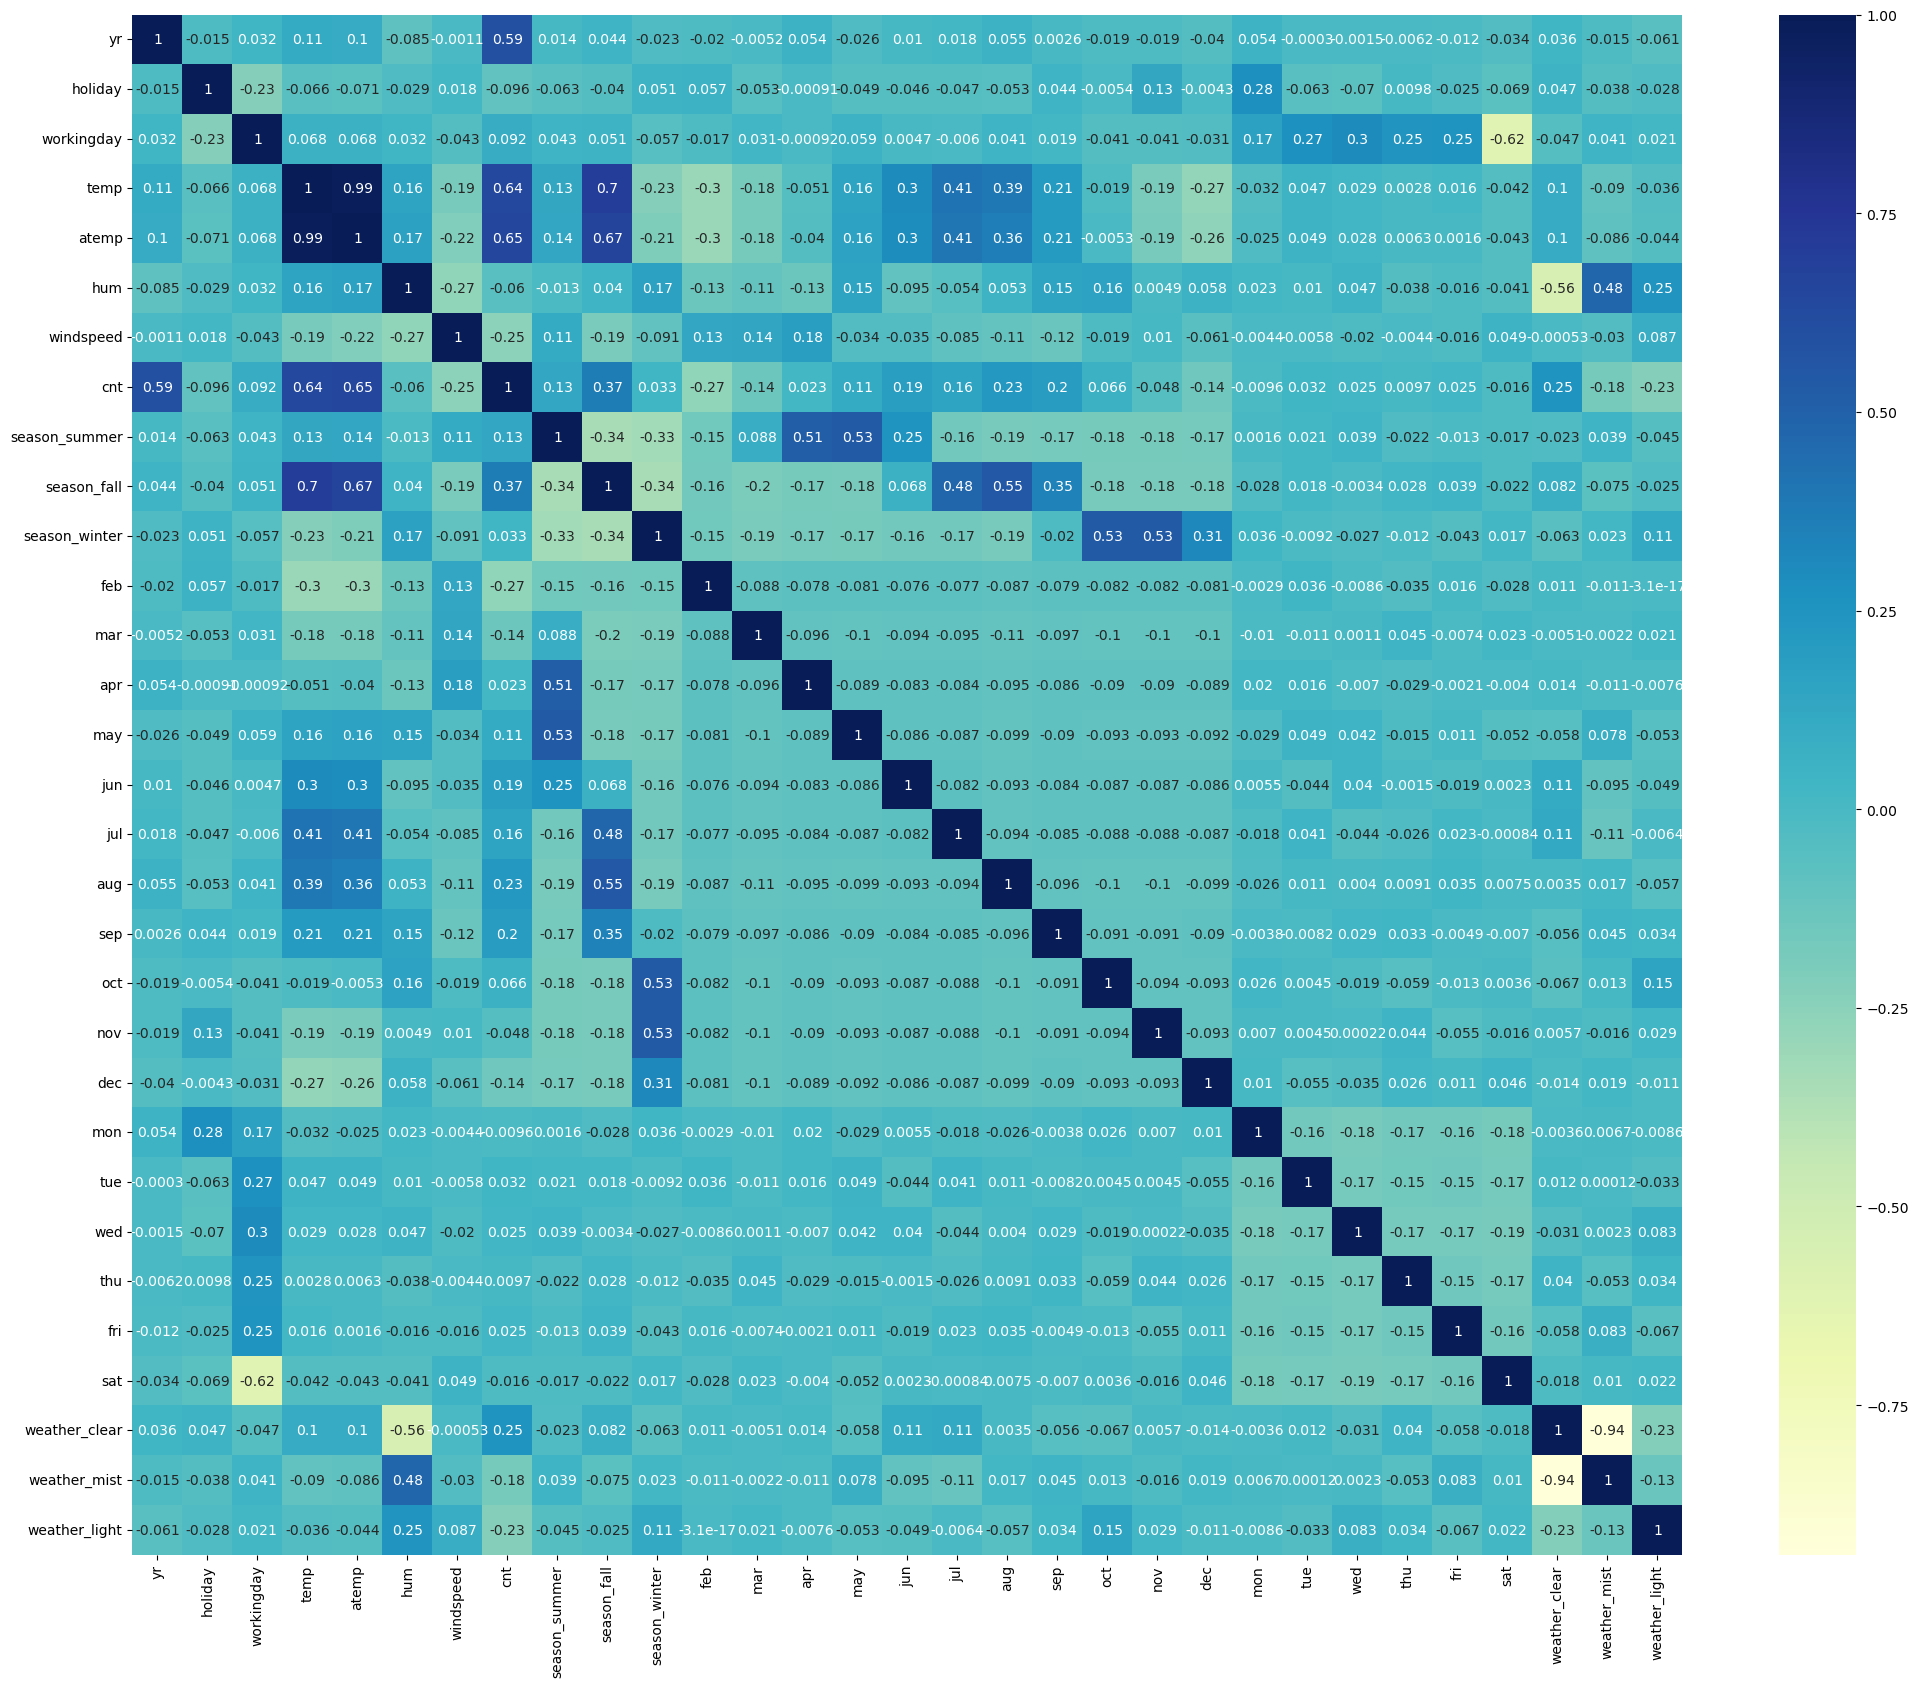

In [265]:
# Let's check the correlation coefficients on all columns to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(bike_df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [266]:
# We can clearly observe that the temp and atemp are highly correlated with cnt. It just makes sense that when the temp is good, bike rentals are on the rise

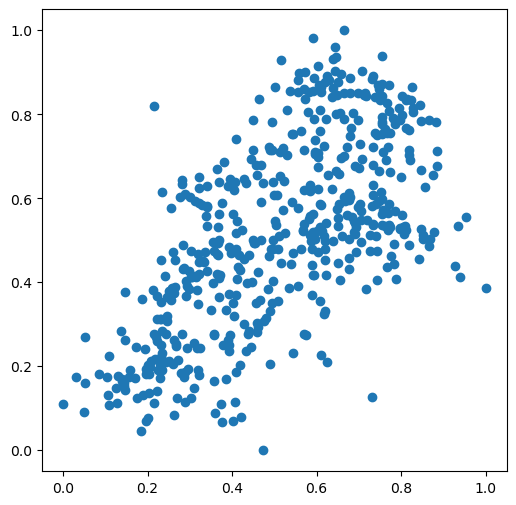

In [267]:
#Pairplot between atemp and cnt to find out whether there is any linear relationship
plt.figure(figsize=[6,6])
plt.scatter(bike_df_train.atemp, bike_df_train.cnt)
plt.show()

### Observation:
     a. From the above graph, it is very clear that the independent variable atemp and target variable cnt are linearly related
     b. Also since the temp and atemp are correlated at 0.99, we will consider dropping one of the variables for further analysis

In [268]:
bike_df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_summer', 'season_fall', 'season_winter', 'feb', 'mar',
       'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'mon',
       'tue', 'wed', 'thu', 'fri', 'sat', 'weather_clear', 'weather_mist',
       'weather_light'],
      dtype='object')

In [269]:
# We build a linear regression model for this variable (atemp) first
# Dividing into X and Y sets for the model building 
y_train = bike_df_train.pop('cnt')
X_train = bike_df_train

## Step 6: Building a linear model

In [270]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [271]:
# Check the parameters obtained

lr.params

const    0.162924
atemp    0.683633
dtype: float64

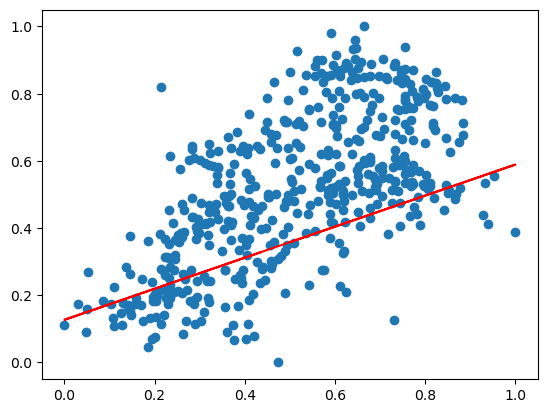

In [272]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [273]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           1.10e-61
Time:                        15:42:35   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

In [274]:
# We got the R-square value of 0.418.  Now we will add other variables and see how the model fits

In [275]:
# Adding temp variable to the model
X_train_lm = X_train[['atemp', 'temp']]

In [276]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.163383
atemp    0.492316
temp     0.181818
dtype: float64

In [277]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.5
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           1.95e-60
Time:                        15:42:42   Log-Likelihood:                 176.81
No. Observations:                 510   AIC:                            -347.6
Df Residuals:                     507   BIC:                            -334.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1634      0.020      8.215      0.0

#### There is a slight improvement to the R Squared value. It increased from 0.418 to 0.419.  
#### Now we will add the next correlated variable year

In [278]:
X_train_lm = X_train[['atemp', 'temp','yr']]

In [279]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.072352
atemp    0.545027
temp     0.076265
yr       0.237672
dtype: float64

In [280]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     385.8
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          2.62e-130
Time:                        15:43:03   Log-Likelihood:                 341.97
No. Observations:                 510   AIC:                            -675.9
Df Residuals:                     506   BIC:                            -659.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0724      0.015      4.820      0.0

### RSquared value has improved to 0.696 with the addition of yr variable. We will try adding other features to it

## Adding all variables to the model


In [281]:
# Check all the columns of the dataframe
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_summer', 'season_fall', 'season_winter', 'feb', 'mar',
       'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'mon',
       'tue', 'wed', 'thu', 'fri', 'sat', 'weather_clear', 'weather_mist',
       'weather_light'],
      dtype='object')

In [282]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_summer', 'season_fall', 'season_winter', 'feb', 'mar', 'apr',
       'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'mon', 'tue',
       'wed', 'thu', 'fri', 'sat', 'weather_clear', 'weather_mist',
       'weather_light'],
      dtype='object')

In [283]:
#Build a linear model with all variables in X_train dataset

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const            0.052281
yr               0.232208
holiday         -0.042394
workingday       0.043879
temp             0.401322
atemp            0.050628
hum             -0.151812
windspeed       -0.184388
season_summer    0.086796
season_fall      0.048580
season_winter    0.153968
feb              0.030389
mar              0.063853
apr              0.062565
may              0.087257
jun              0.060862
jul              0.023289
aug              0.078641
sep              0.144371
oct              0.070260
nov              0.020783
dec              0.016994
mon             -0.009946
tue             -0.007753
wed              0.005823
thu              0.001806
fri              0.011556
sat              0.054533
weather_clear    0.123336
weather_mist     0.062306
weather_light   -0.133361
dtype: float64

In [284]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          8.42e-181
Time:                        15:43:17   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0523      0.027      1.969

### Checking VIF to see if we can find any correlated variables that could be dropped from the model

In [285]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [286]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,thu,inf
25,fri,inf
23,wed,inf
1,holiday,inf
22,tue,inf
21,mon,inf
2,workingday,inf
3,temp,67.12
4,atemp,56.09
27,weather_clear,37.78


In [287]:
#Some features are having infinite vif suggesting a multicollinearity problem. Will drop the first one -thu
X = X_train.drop(['thu'],axis=1)

In [288]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [289]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          8.42e-181
Time:                        15:43:28   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0523      0.027      1.969

In [290]:
X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_summer', 'season_fall', 'season_winter', 'feb', 'mar', 'apr',
       'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'mon', 'tue',
       'wed', 'fri', 'sat', 'weather_clear', 'weather_mist', 'weather_light'],
      dtype='object')

In [291]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,67.12
4,atemp,56.09
26,weather_clear,37.78
27,weather_mist,27.44
8,season_fall,11.37
16,aug,9.97
15,jul,8.92
9,season_winter,8.21
14,jun,6.87
17,sep,6.76


### Observation:
   a. Evidently temp and atemp are highly correlated. atemp is just a feeling temperature value as per the data dictionary.
   
   b. We will drop the atemp feature and see the effect. It also has a p-value of 0.714

In [292]:
# Dropping highly correlated variables and insignificant variables
X = X.drop(['atemp'],axis=1)

In [293]:
X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_fall', 'season_winter', 'feb', 'mar', 'apr',
       'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'mon', 'tue',
       'wed', 'fri', 'sat', 'weather_clear', 'weather_mist', 'weather_light'],
      dtype='object')

In [294]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [295]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          8.74e-182
Time:                        15:43:42   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0524      0.027      1.974

In [296]:
X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_fall', 'season_winter', 'feb', 'mar', 'apr',
       'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'mon', 'tue',
       'wed', 'fri', 'sat', 'weather_clear', 'weather_mist', 'weather_light'],
      dtype='object')

In [297]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
25,weather_clear,37.74
26,weather_mist,27.42
7,season_fall,11.35
15,aug,9.88
14,jul,8.90
8,season_winter,8.21
3,temp,7.12
13,jun,6.83
16,sep,6.75
6,season_summer,6.71


### Observation:

   a. After removing the highly correlated variables atemp and the one with infinite VIF - thu, we could see that the model is yielding a R-square value of 0.853
   
   b. We still have some work to do as there are columns with high VIF and p-values

In [298]:
# Dropping highly correlated variables and insignificant variables. Feature wed has a p-value of 0.793. Hence dropping this columns
X = X.drop(['wed'], axis=1)

In [299]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [300]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.0
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          8.61e-183
Time:                        15:44:04   Log-Likelihood:                 527.92
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     483   BIC:                            -887.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0523      0.027      1.972

In [301]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,weather_clear,37.71
25,weather_mist,27.41
7,season_fall,11.34
15,aug,9.87
14,jul,8.89
8,season_winter,8.21
3,temp,7.12
13,jun,6.82
16,sep,6.75
6,season_summer,6.71


#### VIF values are still above 5 for few features. We will drop jul feature which has a high p-value of 0.604

In [302]:
X = X.drop(['jul'],axis=1)

In [303]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [304]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.5
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          9.17e-184
Time:                        15:44:13   Log-Likelihood:                 527.78
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     484   BIC:                            -893.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0532      0.026      2.013

In [305]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,weather_clear,37.58
24,weather_mist,27.29
8,season_winter,7.42
7,season_fall,7.31
6,season_summer,5.74
3,temp,4.66
17,nov,4.12
16,oct,4.02
25,weather_light,3.98
12,may,3.57


In [306]:
#In the next pass, we will drop nov feature which has a p-value of 0.665

In [307]:
X = X.drop(['nov'],axis=1)

In [308]:
# Build a fifth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [309]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.4
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          9.19e-185
Time:                        15:44:23   Log-Likelihood:                 527.68
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     485   BIC:                            -899.5
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0541      0.026      2.054

In [310]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,weather_clear,37.24
23,weather_mist,27.16
7,season_fall,7.24
6,season_summer,5.73
3,temp,4.57
24,weather_light,3.97
12,may,3.54
11,apr,3.21
8,season_winter,3.11
2,workingday,2.34


In [311]:
# Now, we will drop the dec feature. It has a p-value of 0.834

In [312]:
X = X.drop(['dec'],axis=1)

In [313]:
# Build a sixth fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [314]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.7
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          8.38e-186
Time:                        15:44:33   Log-Likelihood:                 527.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     486   BIC:                            -905.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0544      0.026      2.071

In [315]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,weather_clear,36.96
22,weather_mist,27.07
7,season_fall,7.23
6,season_summer,5.73
3,temp,4.52
23,weather_light,3.96
12,may,3.53
11,apr,3.19
8,season_winter,2.99
2,workingday,2.34


In [316]:
# Dropping fri as its p-value is 0.588
X = X.drop(['fri'],axis=1)

In [317]:
# Build a seventh fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [318]:
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     128.5
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          8.44e-187
Time:                        15:44:41   Log-Likelihood:                 527.50
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     487   BIC:                            -911.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0545      0.026      2.078

In [319]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,weather_clear,36.94
21,weather_mist,27.02
7,season_fall,7.23
6,season_summer,5.73
3,temp,4.52
22,weather_light,3.96
12,may,3.53
11,apr,3.19
8,season_winter,2.99
13,jun,2.33


In [320]:
# Dropping tue which is having a p-value of 0.256
X = X.drop(['tue'],axis=1)

In [321]:
# Build a eighth fitted model
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [322]:
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.5
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.36e-187
Time:                        15:44:49   Log-Likelihood:                 526.82
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     488   BIC:                            -916.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0563      0.026      2.147

In [323]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,weather_clear,36.86
20,weather_mist,26.95
7,season_fall,7.23
6,season_summer,5.73
3,temp,4.52
21,weather_light,3.94
12,may,3.53
11,apr,3.19
8,season_winter,2.99
13,jun,2.32


In [324]:
# Dropping feature mon. its p-value is 0.276
X = X.drop(['mon'],axis=1)

In [325]:
# Build a ninth fitted model
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [326]:
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     141.1
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          2.04e-188
Time:                        15:44:58   Log-Likelihood:                 526.20
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     489   BIC:                            -921.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0573      0.026      2.187

In [327]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,weather_clear,36.82
19,weather_mist,26.92
7,season_fall,7.22
6,season_summer,5.72
3,temp,4.51
20,weather_light,3.94
12,may,3.53
11,apr,3.19
8,season_winter,2.99
13,jun,2.32


In [328]:
#dropping variable feb due to its p-value of 0.200
X = X.drop(['feb'],axis=1)

In [329]:
# Build a tenth fitted model
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

In [330]:
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.2
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          3.75e-189
Time:                        15:45:05   Log-Likelihood:                 525.34
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0647      0.026      2.530

In [331]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,weather_clear,34.69
18,weather_mist,25.70
7,season_fall,6.65
6,season_summer,5.63
3,temp,4.50
19,weather_light,3.80
11,may,3.43
10,apr,3.10
8,season_winter,2.46
12,jun,2.27


In [332]:
X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_fall', 'season_winter', 'mar', 'apr', 'may',
       'jun', 'aug', 'sep', 'oct', 'sat', 'weather_clear', 'weather_mist',
       'weather_light'],
      dtype='object')

In [333]:
# Dropping jun due to is p-value of 0.085
X = X.drop(['jun'],axis=1)

In [334]:
# Build a eleventh fitted model
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [335]:
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     155.7
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.30e-189
Time:                        15:45:19   Log-Likelihood:                 523.80
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     491   BIC:                            -929.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0662      0.026      2.588

In [336]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,weather_clear,34.65
17,weather_mist,25.66
7,season_fall,6.53
6,season_summer,4.40
3,temp,3.93
18,weather_light,3.80
8,season_winter,2.38
11,may,2.12
10,apr,2.10
4,hum,1.95


In [337]:
# Dropping apr as its p-value is 0.362
X = X.drop(['apr'],axis=1)


In [338]:
# Build a twelth fitted model
X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()

In [339]:
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.8
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.51e-190
Time:                        15:45:32   Log-Likelihood:                 523.36
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     492   BIC:                            -934.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0678      0.026      2.653

In [340]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,weather_clear,34.46
16,weather_mist,25.56
7,season_fall,6.49
3,temp,3.84
17,weather_light,3.78
6,season_summer,2.82
8,season_winter,2.38
4,hum,1.95
2,workingday,1.89
14,sat,1.79


In [341]:
# Dropping may as its p-value is 0.085 
X = X.drop(['may'],axis=1)

In [342]:
# Build a thirteenth fitted model
X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm).fit()

In [343]:
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.2
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          4.93e-191
Time:                        15:45:37   Log-Likelihood:                 521.82
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0630      0.025      2.475

In [344]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,weather_clear,34.02
15,weather_mist,25.31
7,season_fall,6.29
16,weather_light,3.75
3,temp,3.72
6,season_summer,2.65
8,season_winter,2.34
4,hum,1.92
2,workingday,1.88
13,sat,1.79


In [345]:
X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_fall', 'season_winter', 'mar', 'aug', 'sep',
       'oct', 'sat', 'weather_clear', 'weather_mist', 'weather_light'],
      dtype='object')

In [346]:
#Dropping weather_clear as its vif is 34.02
X = X.drop(['weather_clear'],axis=1)

In [347]:
# Build a fourteenth fitted model
X_train_lm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_lm).fit()

In [348]:
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.2
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          4.93e-191
Time:                        15:45:46   Log-Likelihood:                 521.82
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1888      0.029      6.545

In [349]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,24.19
4,hum,17.54
7,season_fall,8.53
2,workingday,5.09
5,windspeed,3.94
6,season_summer,3.51
8,season_winter,3.08
14,weather_mist,2.15
0,yr,2.04
13,sat,1.92


In [350]:
#Dropping temp as its vif is 24.19
X = X.drop(['temp'],axis=1)

In [351]:
# Build a fifteenth fitted model
X_train_lm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_lm).fit()

In [352]:
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     119.3
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          2.48e-153
Time:                        15:45:53   Log-Likelihood:                 428.94
No. Observations:                 510   AIC:                            -825.9
Df Residuals:                     494   BIC:                            -758.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2552      0.034      7.473

In [353]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,12.38
2,workingday,5.05
4,windspeed,3.90
6,season_fall,3.59
7,season_winter,2.87
5,season_summer,2.08
0,yr,1.99
13,weather_mist,1.99
12,sat,1.91
9,aug,1.85


In [354]:
#Dropping hum as its vif is 12.38 and a p-value of 0.499
X = X.drop(['hum'],axis=1)

In [355]:
# Build a sixteenth fitted model
X_train_lm = sm.add_constant(X)

lr_16 = sm.OLS(y_train, X_train_lm).fit()

In [356]:
print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     128.0
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          2.70e-154
Time:                        15:46:05   Log-Likelihood:                 428.71
No. Observations:                 510   AIC:                            -827.4
Df Residuals:                     495   BIC:                            -763.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2362      0.020     12.103

In [357]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,3.99
3,windspeed,3.54
5,season_fall,3.07
6,season_winter,2.37
0,yr,1.95
8,aug,1.85
4,season_summer,1.78
11,sat,1.70
10,oct,1.57
12,weather_mist,1.54


In [358]:
# Drop holiday feature as it has a p value of 0.141
X = X.drop(['holiday'],axis=1)

In [359]:
X.columns

Index(['yr', 'workingday', 'windspeed', 'season_summer', 'season_fall',
       'season_winter', 'mar', 'aug', 'sep', 'oct', 'sat', 'weather_mist',
       'weather_light'],
      dtype='object')

In [360]:
# Build a seventeenth fitted model
X_train_lm = sm.add_constant(X)

lr_17 = sm.OLS(y_train, X_train_lm).fit()

In [361]:
print(lr_17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     137.2
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          7.47e-155
Time:                        15:46:21   Log-Likelihood:                 427.47
No. Observations:                 510   AIC:                            -826.9
Df Residuals:                     496   BIC:                            -767.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2280      0.019     12.118

In [362]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,3.76
2,windspeed,3.39
4,season_fall,3.06
5,season_winter,2.33
0,yr,1.94
7,aug,1.85
3,season_summer,1.77
10,sat,1.64
9,oct,1.57
11,weather_mist,1.54


### Observation:
    Now we can see that the VIFs and p-values are within an acceptable range. 
    So we go ahead and make our predictions using this model only.

## Step 7: Residual Analysis of the train data

#### Plotting histogram to check if the model we have come up with is normally distributed

In [363]:
y_train_cnt = lr_17.predict(X_train_lm)

Text(0.5, 0, 'Errors')

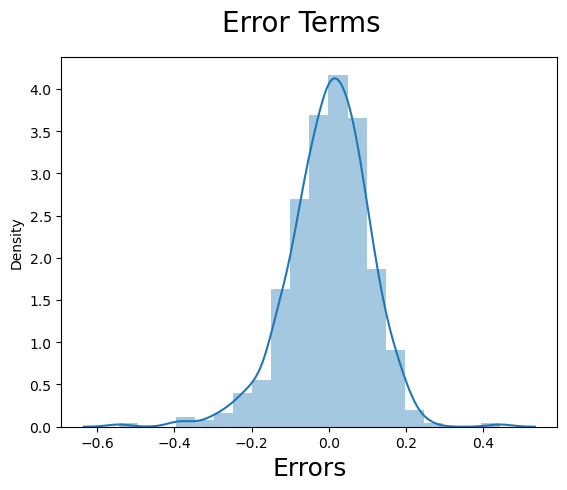

In [364]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model
#### Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 17th model.

In [365]:
# Applying scaling on test sets

In [366]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

bike_df_test[num_vars] = scaler.transform(bike_df_test[num_vars])

In [367]:
bike_df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,dec,mon,tue,wed,thu,fri,sat,weather_clear,weather_mist,weather_light
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,...,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.652968,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,...,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.477117,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [368]:
y_test = bike_df_test.pop('cnt')
X_test = bike_df_test

In [369]:
# Adding constant variable to test dataframe
X_test_m17 = sm.add_constant(X_test)

In [370]:
# Creating X_test_m17 dataframe by dropping variables from X_test_m17
X_test_m17 =  X_test_m17.drop(["thu", "atemp", "wed","jul","nov","dec","fri","tue","mon","feb","jun","apr", "may","weather_clear","temp","hum","holiday"], axis = 1)

In [371]:
# Making predictions using the seventeenth model

y_pred_m17 = lr_17.predict(X_test_m17)

## Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

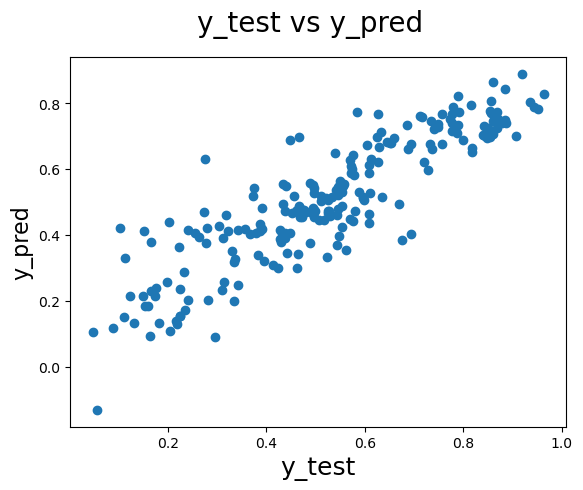

In [372]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m17)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [373]:
# We could observe that the Predicted and test seems linear.

## Step 10: Find R square score for the test set

In [374]:
# Get the R squared value of the test set
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m17)

0.7728484524285169

## Observation:

     The R Square value for test model is almost close to the train model
     

## Train Model R2 Score --> 0.782
## Test model R2 Score --> 0.773

## Hence our best fitted model is:
#### cnt =  0.2467 * yr + 0.0555 * workingday -0.1778 * windspeed + 0.2598 * season_summer + 0.2851 * season_fall + 0.1979 * season_winter + 0.039 * mar + 0.0415 * aug + 0.0972 * sep + 0.0999 * oct + 0.0626 * sat  -0.0951 * weather_mist -0.3185 * weather_light

### Interpretation on the final model

   a. Company should focus on fall season and then by summer where the co-efficients are high
   
   b. Bike rentals are significant during the months of August to September. Management can make a note of this and strategize marketing around these months to promote sales for rentals
   
   c. Model predicted that the number of rentals have gone up from 2018 to 2019. If the company can maintain focus, they could expect higher number of rentals in subsequent years
   
   d. Saturday of the week seems to have spike in rentals
   
   e. Weather sitaution of mist and light rain will have an impact on the rentals. Company can consider this while running advertisement campaign to boost sales
   
   f. People have rented bikes during working days. Management can look into this aspect as well 
   

## Summary
  Based on the dataset provided, the final model that is arrived at predicted what all features the company should put their focus and strategies on to boost sales for rentals.